In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as pyplot

In [ ]:
import seaborn as sns

In [ ]:
import sklearn as KBinsDiscretizer

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [ ]:
boston_df=pd.read_csv(boston_url)

## Ejercicio Parte I



Valor medio de las casas ocupadas por el propietario

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Para el "Valor medio de las casas ocupadas por el propietario", proporcione un diagrama de caja.

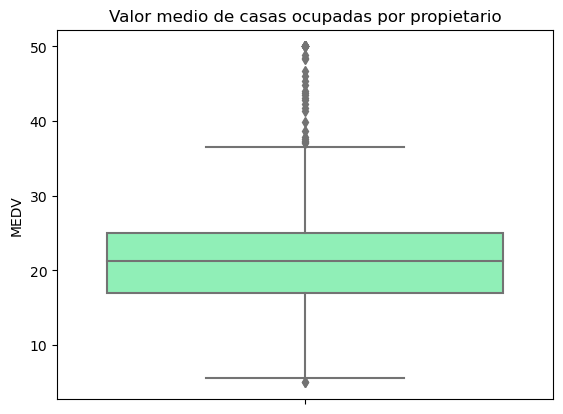

In [ ]:
ax = sns.boxplot(y='MEDV', palette='rainbow', data=boston_df).set(title='Valor medio de casas ocupadas por propietario')


#ax.set_ylabel('Valor medio')

### Proporcionar un histograma para la variable del río Charles.

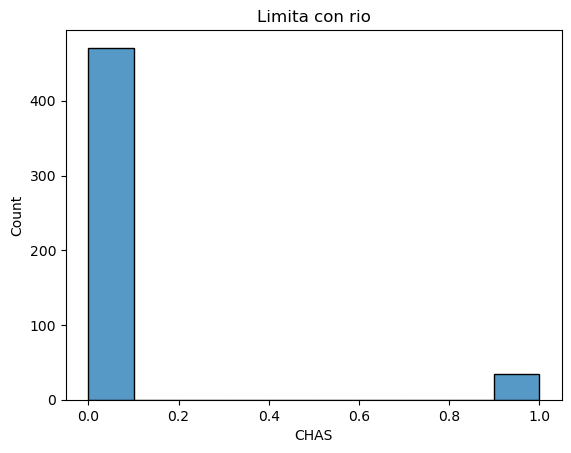

In [ ]:
dis = sns.histplot(x='CHAS', palette='rainbow', data=boston_df).set(title='Limita con rio')

###  Proporcione un diagrama de caja para la variable MEDV frente a la variable AGE. (Discretizar la variable de edad (age) en tres grupos de 35 años o menos, entre 35 y 70 años y 70 años y más).

In [ ]:
#Discretizando en partes iguales según la data que se tiene
edad=np.array(boston_df['AGE'])
res = pd.cut(edad, bins=3,labels=['b','m','a'], include_lowest=True, retbins=True)

print(res[1])
 

[  2.8029      35.26666667  67.63333333 100.        ]


In [ ]:
#Discretizando en partes que uno configura
edad=np.array(boston_df['AGE'])
res = pd.cut(edad, bins=[0,35,70,100],labels=['Joven','Adulto','Mayor'], include_lowest=True, retbins=True)

print(res, "\n")
print(res[1], "\n")
print(res[0].codes, "\n")
print(res[0].categories)

(['Adulto', 'Mayor', 'Adulto', 'Adulto', 'Adulto', ..., 'Adulto', 'Mayor', 'Mayor', 'Mayor', 'Mayor']
Length: 506
Categories (3, object): ['Joven' < 'Adulto' < 'Mayor'], array([  0,  35,  70, 100])) 

[  0  35  70 100] 

[1 2 1 1 1 1 1 2 2 2 2 2 1 1 2 1 0 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 0 0 0 0 0 0 1 0 0 2 2 1 1 1 0 0 1 0 1 1 0 1 1 2 1 1 1 0 0 0 1 0 0 0 0 0
 0 1 2 1 1 1 0 2 0 1 1 1 1 1 2 1 1 2 1 0 2 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 2 1 2 1 2 2 2
 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 2 1 2 2 2 1 0 0 1 1 2 2 2 2 2
 2 2 2 2 2 2 0 0 1 2 2 2 1 1 2 2 0 1 1 1 1 0 2 2 0 2 1 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 1 2 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 1 0 0 1 1 0 0 1 1 2 2 2 2 1 1 2 2 2 2 2 2 1 1 1 1 1 2 1 0 0 1 0 0 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
boston_df['Edad']=res[0].codes
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  Edad        506 non-null    int8   
dtypes: float64(13), int64(1), int8(1)
memory usage: 56.0 KB


In [ ]:
boston_df['CatEdad']=np.array(res[0])
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  Edad        506 non-null    int8   
 15  CatEdad     506 non-null    object 
dtypes: float64(13), int64(1), int8(1), object(1)
memory usage: 59.9+ KB


In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Edad,CatEdad
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,1,Adulto
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,2,Mayor
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1,Adulto
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,1,Adulto
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,1,Adulto


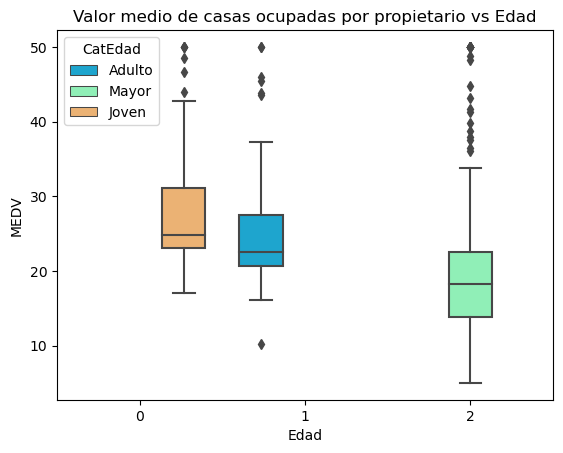

In [ ]:
ax2 = sns.boxplot( y='MEDV',x='Edad', hue='CatEdad',palette='rainbow', data=boston_df).set(title='Valor medio de casas ocupadas por propietario vs Edad')

### Proporcionar un diagrama de dispersión para mostrar la relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad. ¿Qué puedes decir sobre la relación?

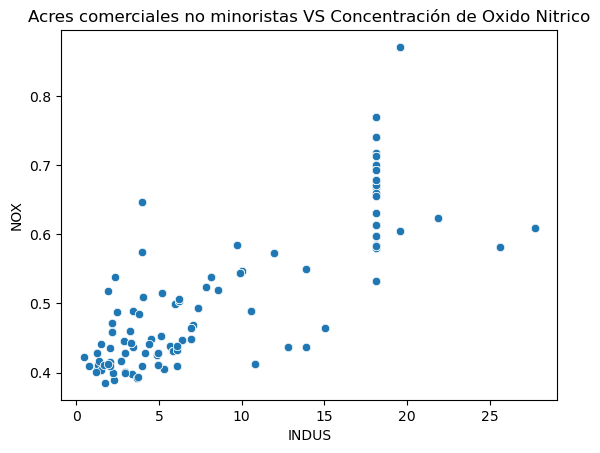

In [ ]:
ax3 = sns.scatterplot(x='INDUS', y='NOX',data=boston_df).set(title='Acres comerciales no minoristas VS Concentración de Oxido Nitrico')

#Mientras ha crecido los acres comerciales por ciudad, proporcionalmente ha crecido la concentración de óxido nitrico.

### Crear un histograma para la variable de proporción de alumnos por maestro.

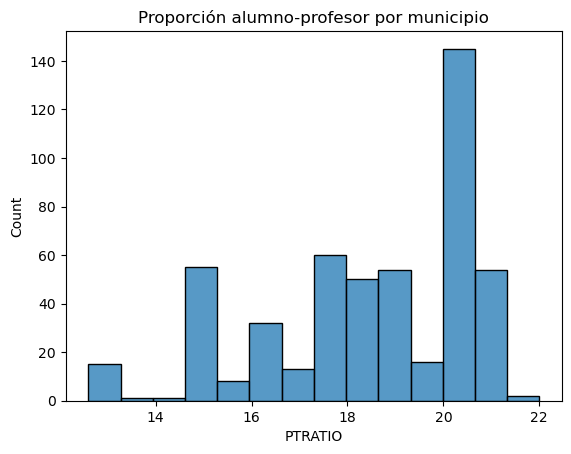

In [ ]:
dis2 = sns.histplot(x='PTRATIO', palette='rainbow', data=boston_df).set(title='Proporción alumno-profesor por municipio')

## Ejercicios Parte II

###  ¿Existe una diferencia significativa en el valor medio de las casas delimitadas por el río Charles o no? (Prueba T para muestras independientes).

#### H_0: No hay diferencia significante entre el valor medio de las casas delimitadas por el río Charles.
#### H_1: Hay diferencia significante entre el valor medio de las casas delimitadas por el río Charles.

In [ ]:
import scipy.stats as stats

In [ ]:
# CHAS 
grupo1 = boston_df[boston_df["CHAS"] == 1]["MEDV"]
grupo2 = boston_df[boston_df["CHAS"] == 0]["MEDV"]

# T-Test
t_stat, p_val = stats.ttest_ind(grupo1, grupo2)

print("Estadística t:", t_stat)
print("Valor p:", p_val)

Estadística t: 3.996437466090509
Valor p: 7.390623170519905e-05


In [ ]:
#CONCLUSIÓN: Se rechaza la hipotesis nula, debido a que es menor que 0.05. Por tanto, si hay diferencia significante entre el valor medio de las casas delimitadas 
#por el río Charles.

### ¿Existe una diferencia en los valores medianos de las casas (MEDV) para cada proporción de unidades ocupadas por el propietario construidas antes de 1940 (AGE)? (ANOVA).

#### H_0:µ_0=µ_1=µ_2  (las medias de las tres poblaciones son iguales)
#### H_1:  al menos una de las medias es distinta

In [ ]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Edad,CatEdad
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,1,Adulto
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,2,Mayor
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,1,Adulto
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,1,Adulto
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,1,Adulto


In [ ]:
joven = boston_df[boston_df['CatEdad']=='Joven']['MEDV']
adulto = boston_df[boston_df['CatEdad']=='Adulto']['MEDV']
mayor = boston_df[boston_df['CatEdad']=='Mayor']['MEDV']

In [ ]:
f_statistic, p_value = scipy.stats.f_oneway(joven,adulto,mayor)
print("F_Statistic:{0}, p-value: {1}".format(f_statistic,p_value))

F_Statistic:36.40764999196599, p-value: 1.7105011022702984e-15


In [ ]:
#CONCLUSIÓN: Si existe una diferencia entre los valores de MEDV y Edad.

### ¿Podemos concluir que no existe una relación entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas por ciudad? (Correlación de Pearson).

#### H_0: No existe la relación entre concentraciones de óxido nítrico y proporcion de acres comerciales no minuristas
#### H_1: Existe la relación entre concentraciones de óxido nítrico y proporcion de acres comerciales no minuristas

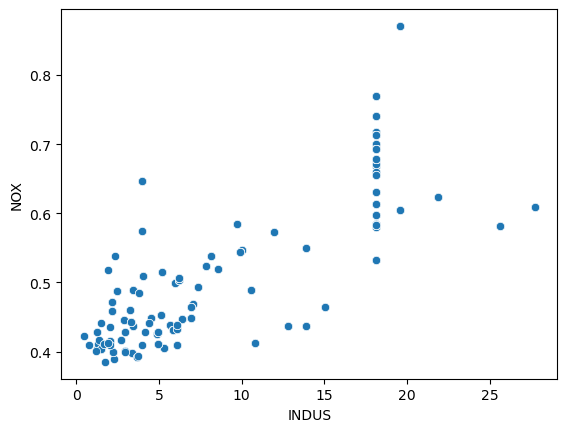

In [ ]:
ax7 = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

In [ ]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

In [ ]:
#CONCLUSIÓN: Se conluye que se rechaza la hipotesis nula , por tanto, se puede decir que si existe una relación entre los valores 
#de concentraciones de óxido nítrico y proporcion de acres comerciales no minuristas

### ¿Cuál es el impacto de una distancia ponderada adicional a los cinco centros de empleo de Boston en el valor medio de las viviendas ocupadas por sus propietarios? (Análisis de regresión).

#### H_0: distancias ponderadas a cinco centros de empleo de Boston no afecta a valor medio de las viviendas ocupadas por sus propietarios
#### H_1: distancias ponderadas a cinco centros de empleo de Boston afecta a valor medio de las viviendas ocupadas por sus propietarios

In [ ]:
import statsmodels.api as sm

In [ ]:
x = boston_df['DIS']
y= boston_df['MEDV']

x=sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions= model.predict(x)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.21e-08
Time:                        03:51:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#CONCLUSION: Se deduce que las distancias ponderadas a cinco centros de empleo de Boston afecta a valor medio de las viviendas ocupadas 
#por sus propietarios